# Importing Intial Modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Reading Data

In [4]:
df=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

In [5]:
df['Year_of_Release']=df['Year_of_Release'].fillna(int(np.mean(df['Year_of_Release'])))
df['Genre']=df['Genre'].fillna('Unknown Genre')
df['Publisher']=df.Publisher.fillna('Unknown Publisher')

# How much Sales is done Per Year?

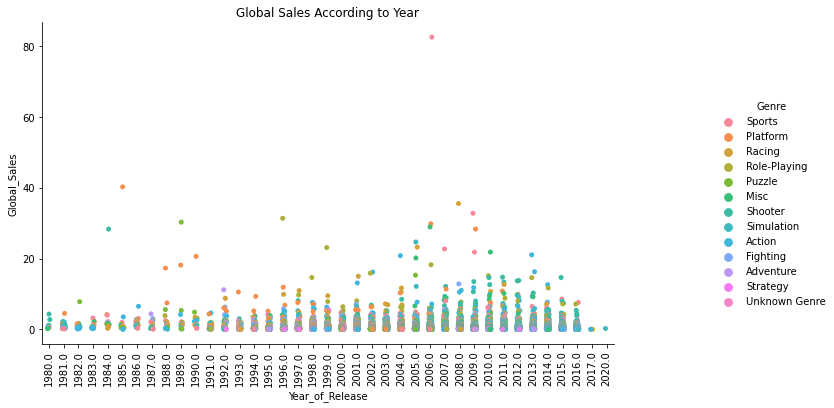

In [6]:
g=sns.catplot(x='Year_of_Release',y='Global_Sales',data=df,hue='Genre')
plt.title('Global Sales According to Year')
plt.xticks(rotation=90)
g.fig.set_figwidth(12)

# Games Frequency Distribution According to Year


In [7]:
px.histogram(df,x='Year_of_Release',color='Genre',hover_data=['Name','Platform','Publisher'])

# Number of Count of Video Games per Genre

In [8]:
px.histogram(df,x='Year_of_Release',y='Genre',color='Publisher')

# Average Sales In Millions


In [9]:
px.pie(data_frame=df,title='Average Sales in Millions',values=[np.sum(df['NA_Sales']),np.sum(df['JP_Sales']),np.sum(df['EU_Sales']),np.sum(df['Other_Sales'])],names=['North American Sales','Japanese Sales','European Sales','Other Sales'])

# Analysis of Best Selling Video Games

In [10]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=4, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.05,
                    subplot_titles=['Top 10 Best Selling Games in North America',
                                    'Top 10 Best Selling Games in Europe',
                                    'Top 10 Best Selling Games in Japna',
                                    'Top 10 Best Selling Games in Other Countries'
                                    ]
                    )
temp=df.head(10)
fig.add_trace(go.Scatter(x=temp['Name'], y=temp['NA_Sales']),
              row=1, col=1)

fig.add_trace(go.Scatter(x=temp['Name'], y=temp['EU_Sales']),
              row=2, col=1)

fig.add_trace(go.Scatter(x=temp['Name'], y=temp['JP_Sales']),
              row=3, col=1)
fig.add_trace(go.Scatter(x=temp['Name'], y=temp['Other_Sales']),
              row=4, col=1)
fig.update_layout(height=800, width=600,
                  title_text="Analysis of Top Video Games")
fig.show()

# Best Selling Genres

In [11]:
map={}
for i in df.iloc[:,:].values:
  if(i[3] not in map):
    map[i[3]]=0
  map[i[3]]+=i[9]
px.bar(x=list(map.keys()),y=list(map.values()),labels={'y':'Genre Count','x':'Genre'})

# Number of Sales According to Publisher of Top 500 Games

In [12]:
px.bar(df.head(500),x='Publisher',y='Global_Sales',color='Genre')

# Number of Sales of Per Year

In [13]:
px.bar(df,x='Year_of_Release',y='Global_Sales',color='Genre')